In [4]:
import numpy as np
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

In [10]:
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

In [14]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [12]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [16]:
y.nunique()

quality    7
dtype: int64

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm

array([[0.29752066, 0.41333333, 0.        , ..., 0.6124031 , 0.19101124,
        0.20289855],
       [0.33057851, 0.53333333, 0.        , ..., 0.37209302, 0.25842697,
        0.26086957],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.41860465, 0.24157303,
        0.26086957],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.20930233, 0.13483146,
        0.20289855],
       [0.14049587, 0.14      , 0.18072289, ..., 0.48062016, 0.08988764,
        0.69565217],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.41860465, 0.05617978,
        0.55072464]])

In [97]:
from src.active import ActiveModule
from src.strategies import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [46]:
np.random.seed(42)
initial_idx = np.random.randint(low=0, high=X_train.shape[0], size=int(0.01*X_train.shape[0]))

In [98]:
learner = ActiveModule(estimator=KNeighborsClassifier,
                       X=X_train,
                       y_initial=y_train.values[initial_idx],
                       label_idx=initial_idx,
                       X_valid=X_test,
                       y_valid=y_test.values,
                       n_neighbors=7)

In [50]:
dupa = KNeighborsClassifier(n_neighbors=7)
dupa.fit(X_train, y_train)

c:\Users\kolga\anaconda3\envs\zum\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [51]:
dupa.score(X_test, y_test)

0.5676923076923077

In [59]:
initial_idx.shape

(51,)

In [99]:
_y, q_idx = None, None
for i in tqdm(range(50)):
    q_idx, _ = learner.step(_y, q_idx, strategy=uncertainty_sampling, n_samples=100)
    _y = y_train.values[q_idx]

100%|██████████| 50/50 [00:18<00:00,  2.70it/s]


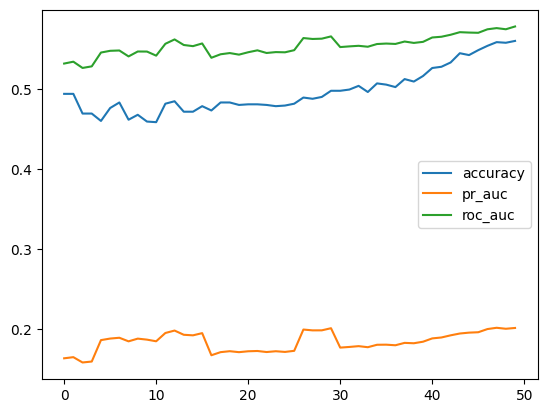

In [100]:
metrics = learner.get_metric_history()

metrics[["accuracy", "pr_auc", "roc_auc"]].plot()
plt.show()

In [101]:
learner.get_metric_history()

,default_metric,accuracy,precision,recall,f1,roc_auc,pr_auc,confusion_matrix
0,0.493846,0.493846,0.493846,0.493846,0.493846,0.531699,0.163382,"[[0, 0, 2, 3, 1, 0, 0], [0, 0, 20, 21, 2, 0, 0..."
1,0.493846,0.493846,0.493846,0.493846,0.493846,0.534041,0.164816,"[[0, 0, 1, 4, 1, 0, 0], [0, 0, 23, 17, 3, 0, 0..."
2,0.469231,0.469231,0.469231,0.469231,0.469231,0.526230,0.158170,"[[0, 0, 3, 2, 1, 0, 0], [0, 0, 20, 19, 4, 0, 0..."
3,0.469231,0.469231,0.469231,0.469231,0.469231,0.528209,0.159349,"[[0, 0, 3, 2, 1, 0, 0], [0, 0, 22, 18, 3, 0, 0..."
4,0.460000,0.460000,0.460000,0.460000,0.460000,0.545467,0.186106,"[[1, 0, 3, 1, 1, 0, 0], [0, 0, 23, 18, 2, 0, 0..."
5,0.476154,0.476154,0.476154,0.476154,0.476154,0.547640,0.188054,"[[1, 0, 3, 1, 1, 0, 0], [0, 0, 24, 17, 2, 0, 0..."
6,0.483077,0.483077,0.483077,0.483077,0.483077,0.548044,0.189059,"[[1, 0, 3, 1, 1, 0, 0], [0, 0, 22, 19, 2, 0, 0..."
7,0.461538,0.461538,0.461538,0.461538,0.461538,0.540635,0.184588,"[[1, 0, 3, 1, 1, 0, 0], [0, 0, 23, 17, 2, 1, 0..."
8,0.467692,0.467692,0.467692,0.467692,0.467692,0.546779,0.187973,"[[1, 0, 3, 1, 1, 0, 0], [0, 1, 19, 21, 1, 1, 0..."
9,0.459231,0.459231,0.459231,0.459231,0.459231,0.546694,0.186716,"[[1, 0, 3, 2, 0, 0, 0], [0, 1, 21, 19, 1, 1, 0..."


In [ ]:
!pip install modAL-python

In [ ]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
from src.active import ActiveModule
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
np.random.seed(42)
initial_idx = np.random.randint(low=0, high=X_train.shape[0], size=int(0.01*X_train.shape[0]))
# initializing the learner
learner = ActiveLearner(
    estimator=KNeighborsClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_train[initial_idx], y_training=y_train.values[initial_idx]
)
X_to_train = X_train.copy()
y_to_train = y_train.values.copy()
# query for labels
for i in range(50):
    query_idx, query_inst = learner.query(X_to_train, n_instances=100)
    print(query_idx)
    

    # ...obtaining new labels from the Oracle...

    # supply label for queried instance
    print(query_idx)
    print(X_to_train[query_idx])
    print(y_to_train[query_idx])
    learner.teach(X_to_train[query_idx], y_to_train[query_idx])
    X_to_train = np.delete(X_to_train, query_idx, axis=0)
    y_to_train = np.delete(y_to_train, query_idx, axis=0)
print(learner.score(X_test, y_test))